# Smiley Data Analysis

## Standard Imports

In [177]:
# for dataframes
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Loading the Data

In [2]:
data = pd.read_csv('../data/smiley.csv')

In [3]:
data.head()

,x,y,t
0,29.25,55.9,1
1,30.15,55.3,1
2,28.65,54.4,1
3,30.75,53.5,1
4,31.75,54.7,1


In [10]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
x,1394.0,53.554735,19.416436,1.65,36.45,53.05,71.65,95.25
y,1394.0,45.273673,22.107190,3.20,27.25,43.20,69.40,77.80
t,1394.0,4.650646,1.750985,0.00,4.00,5.00,6.00,7.00


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 3 columns):
x    1394 non-null float64
y    1394 non-null float64
t    1394 non-null int64
dtypes: float64(2), int64(1)
memory usage: 32.8 KB


## Nullity Analysis

Seeing which columns contains missing values

In [16]:
data.isna().sum()

x    0
y    0
t    0
dtype: int64

## Exploratory Data Analysis

In [19]:
x = data['x']
y = data['y']
t = data['t']

#### Counting number of data in each class

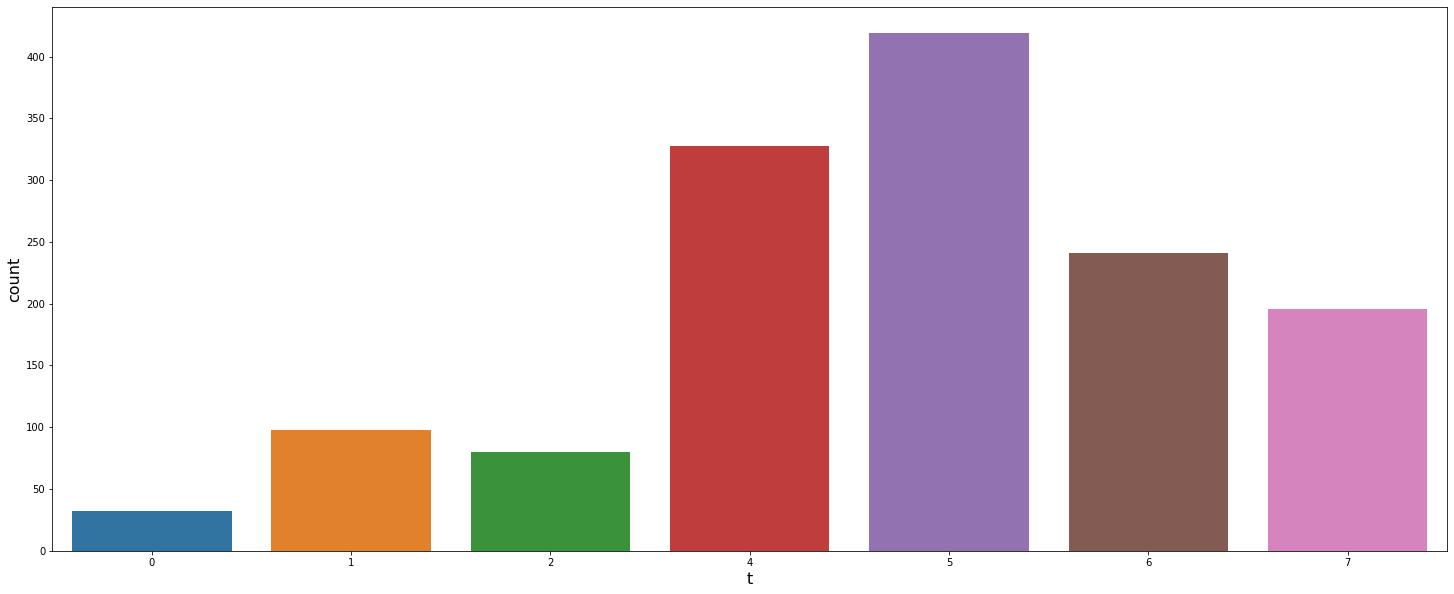

In [176]:
sns.countplot(t);

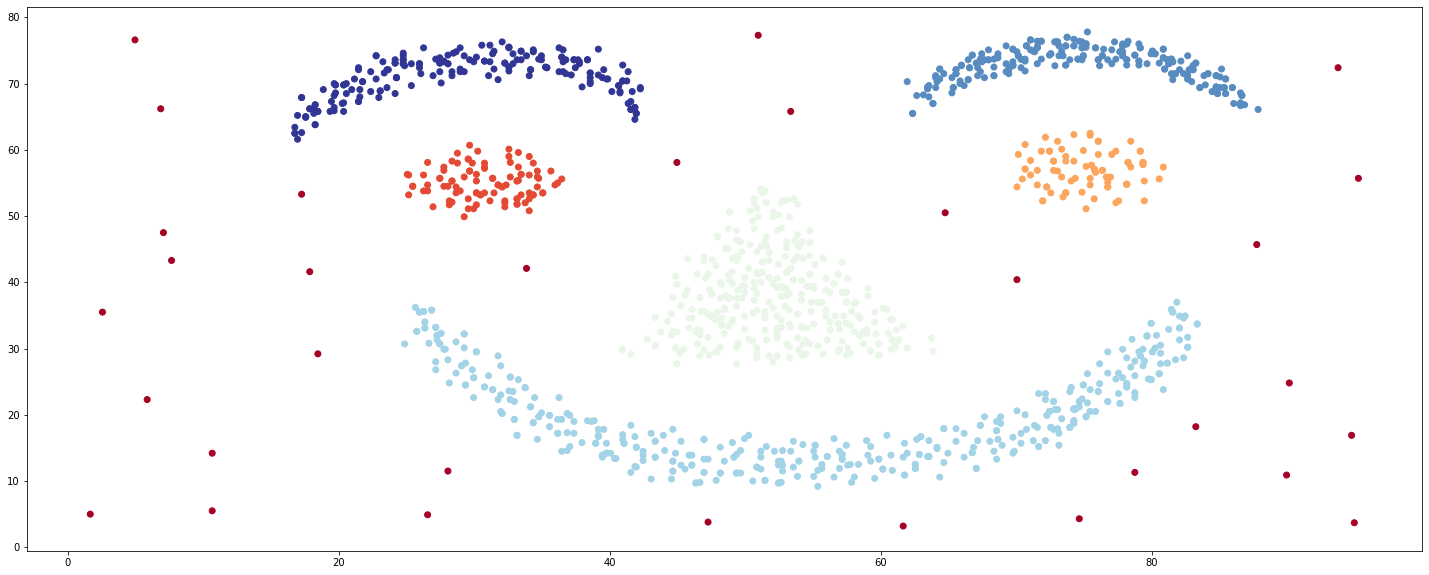

In [116]:
plt.scatter(x, y, c=t, cmap='RdYlBu');

There are 7 different classes in this dataset

## Classification Models

### Logistic Regression

In [124]:
X = data[['x', 'y']]

X_train, X_test, y_train, y_test = train_test_split(X, t, random_state=42)

In [125]:
model = LogisticRegression(penalty="l1", C=10)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [126]:
model.score(X_test, y_test)

0.7851002865329513

### K-Nearest Neighbors

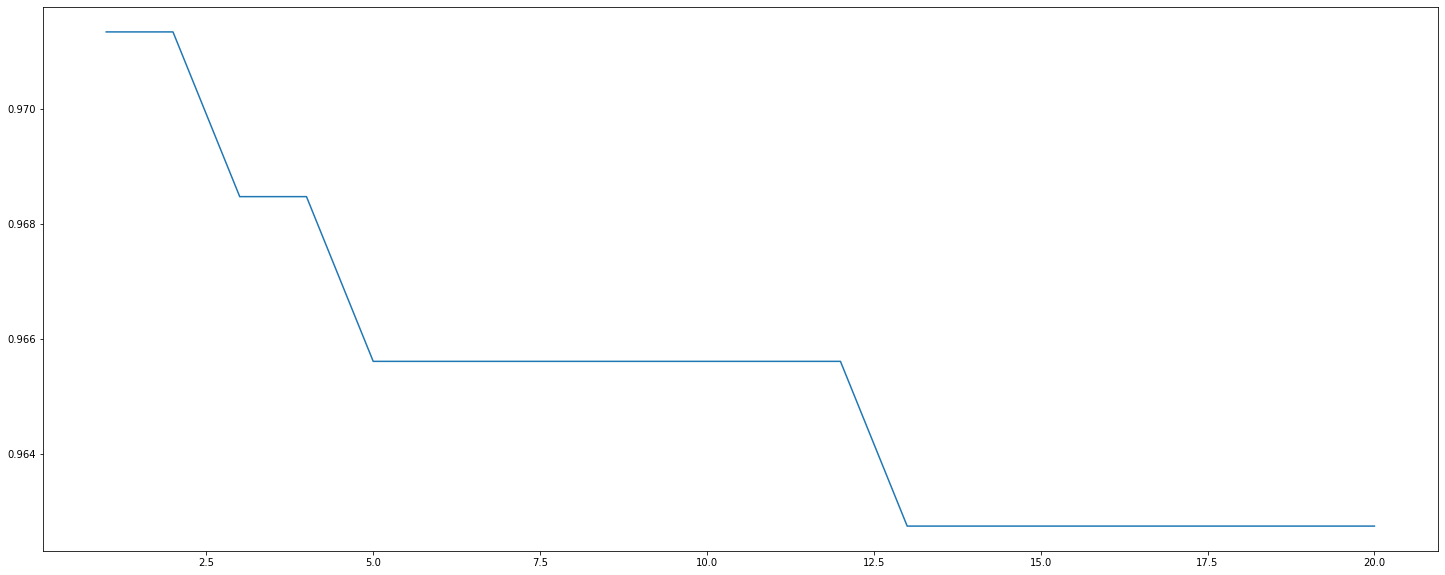

In [168]:
n = range(1,21)
scores = []

for i in n:
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.plot(n, scores)

In [174]:
knn = KNeighborsClassifier(n_neighbors=2)

X_train, X_test, y_train, y_test = train_test_split(X, t, random_state=42)

In [175]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9713467048710601

We see that looking at the nearest 1 or 2 neighbors provides the highest accuracy for our classifier of 97%

## Support Vector Machines

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, t, random_state=42)

In [230]:
svm = SVC(C=1.0, gamma=.02)

In [231]:
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.02, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [232]:
svm.score(X_test, y_test)

0.994269340974212